### Offsets Blending - Preliminary Implementation

In [1]:
# - Import Python Dependencies
from __future__ import print_function
from __future__ import annotations
import os
import pathlib
import datetime
import copy
import yaml
from scipy import ndimage
import matplotlib.pyplot as plt
from offsets_layer import OffsetsLayer
from utils.set_path import set_path_to_data_dir
from utils.mpl_utils import add_colorbar
from merge_offsets_layers import fill_outliers_holes

# - change matplotlib default setting
plt.rc('font', family='monospace')
plt.rc('font', weight='bold')
plt.style.use('seaborn-deep')

In [7]:
#  Processing Parameters
layer_name = 'layer1'       # - Reference High Resolution Layer
metric = 'median_filter'           # - Outlier Determination Metric
threshold =  10             # - Outlier selection threshold
window_az = 51              # - Outlier selection window size - Azimuth
window_rg = 51              # - Outlier selection window size - Range
fill_strategy = 'median'    # - Outlier Elimination Strategy
kernel_size_az = 21         # - median filter kernel size - Azimuth
kernel_size_rg = 21         # - median filter kernel size - Range

In [2]:
# - Load Offset Layers
# - set path to project data directory
data_path = pathlib.Path(set_path_to_data_dir())

# - import sample Offset Layer
layer_1 = OffsetsLayer(data_path.joinpath('layer1'))
layer_2 = OffsetsLayer(data_path.joinpath('layer2'))
layer_3 = OffsetsLayer(data_path.joinpath('layer3'))

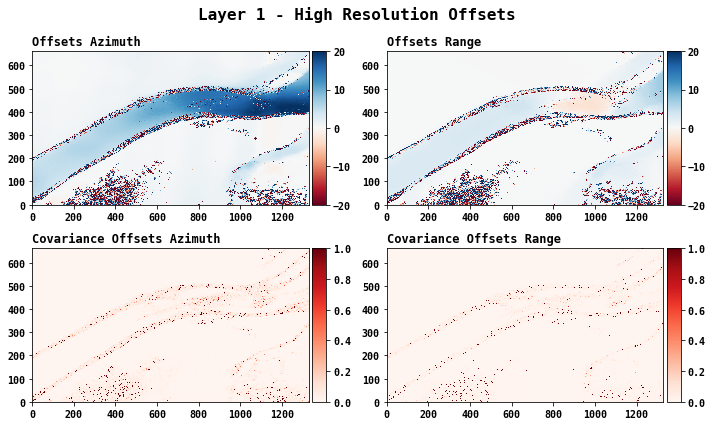

In [4]:
# - Show High-Resolution Offsets
layer_1.show_offsets(cov_range=(0, 1), offsets_range=(-20, 20), title='Layer 1 - High Resolution Offsets')

#### Compute Outliers Mask and Fill No-Data Values by employing the selected blending strategy

In [10]:
# - Outlier determination parameters
outlier_param = {'metric': metric, 'threshold': threshold,
                 'window_az': window_az, 'window_rg': window_rg}

# - Generate a shallow copy of the high-resolution layer
layer_1_c = copy.copy(layer_1)
krn_size = (kernel_size_az, kernel_size_rg)

# -  Fill no-data values using the user-selected strategy
f_layer = fill_outliers_holes(layer_1_c, layer_2,
                              layer_3, outlier_param,
                              fill_strategy=fill_strategy,
                              krn_size=krn_size)
filled_layer = f_layer['filled_layer']

#### Outlier Mask

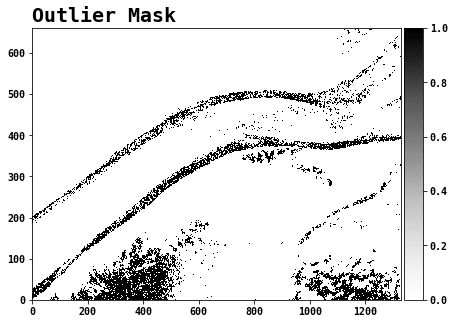

In [11]:
# - Show Outliers Mask
fig_size = (7, 5)
fig = plt.figure(figsize=fig_size)
ax_b = fig.add_subplot(111)
ax_b.set_title('Outlier Mask', weight='bold', loc='left', size=20)
im_b = ax_b.pcolormesh(f_layer['outliers_mask'].T,
                       cmap=plt.get_cmap('Greys'), vmin=0, vmax=1)
add_colorbar(ax_b, im_b)
plt.show()
plt.close()

#### Show input high-resolution layer after outlier blending.

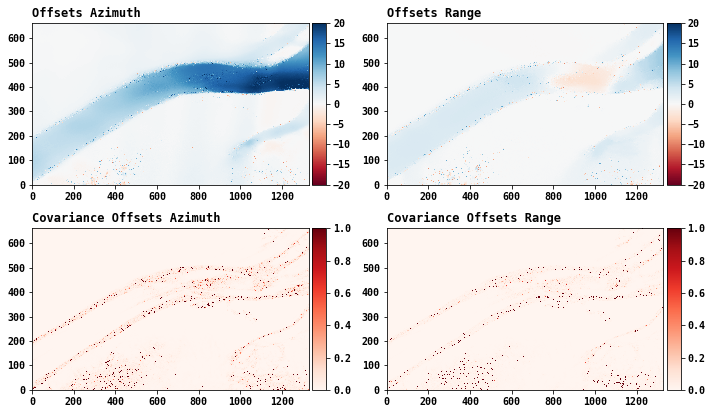

In [12]:
# - Show Offsets after Outlier Removal + Filling
filled_layer.show_offsets(cov_range=(0, 1), offsets_range=(-20, 20))